In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [122]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Documents\flight data\clean training data.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,duration_hour,Minute,Route1,Route2,Route3,Route4,Dep_time_hour,Dep_time_min,Routes
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,2,50,1,1,0,0,22,20,2
1,Air India,1/5/2019,Kolkata,Banglore,2,7662,7,25,1,1,1,1,5,50,4
2,Jet Airways,9/6/2019,Delhi,Cochin,2,13882,19,0,1,1,1,1,9,25,4
3,IndiGo,12/5/2019,Kolkata,Banglore,1,6218,5,25,1,1,1,0,18,5,3
4,IndiGo,1/3/2019,Banglore,New Delhi,1,13302,4,45,1,1,1,0,16,50,3


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Total_Stops      10682 non-null  int64 
 5   Price            10682 non-null  int64 
 6   duration_hour    10682 non-null  int64 
 7   Minute           10682 non-null  int64 
 8   Route1           10682 non-null  int64 
 9   Route2           10682 non-null  object
 10  Route3           10682 non-null  int64 
 11  Route4           10682 non-null  int64 
 12  Dep_time_hour    10682 non-null  int64 
 13  Dep_time_min     10682 non-null  int64 
 14  Routes           10682 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [124]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Total_Stops        0
Price              0
duration_hour      0
Minute             0
Route1             0
Route2             0
Route3             0
Route4             0
Dep_time_hour      0
Dep_time_min       0
Routes             0
dtype: int64

In [125]:
data['Total_Stops']=data['Total_Stops'].astype('float')

In [126]:
data.Total_Stops.unique()

array([0., 2., 1., 3., 4.])

In [127]:
data['year']=pd.to_datetime(data['Date_of_Journey']).dt.year

C:\Users\USER\AppData\Local\Temp\ipykernel_4784\2137031839.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['year']=pd.to_datetime(data['Date_of_Journey']).dt.year


In [128]:
data['day']=pd.to_datetime(data['Date_of_Journey']).dt.day
data['month']=pd.to_datetime(data['Date_of_Journey']).dt.month

C:\Users\USER\AppData\Local\Temp\ipykernel_4784\3312022779.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['day']=pd.to_datetime(data['Date_of_Journey']).dt.day
C:\Users\USER\AppData\Local\Temp\ipykernel_4784\3312022779.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['month']=pd.to_datetime(data['Date_of_Journey']).dt.month


Text(0.5, 1.0, 'flight prices by duration')

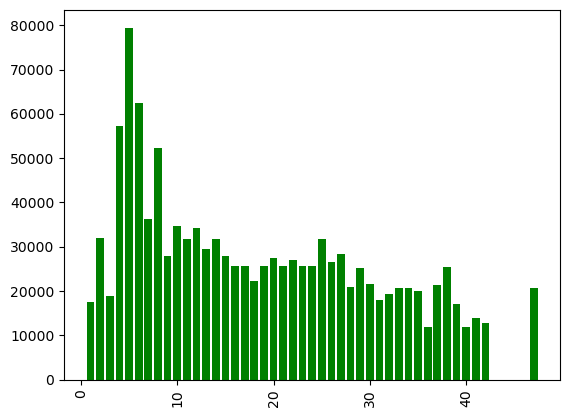

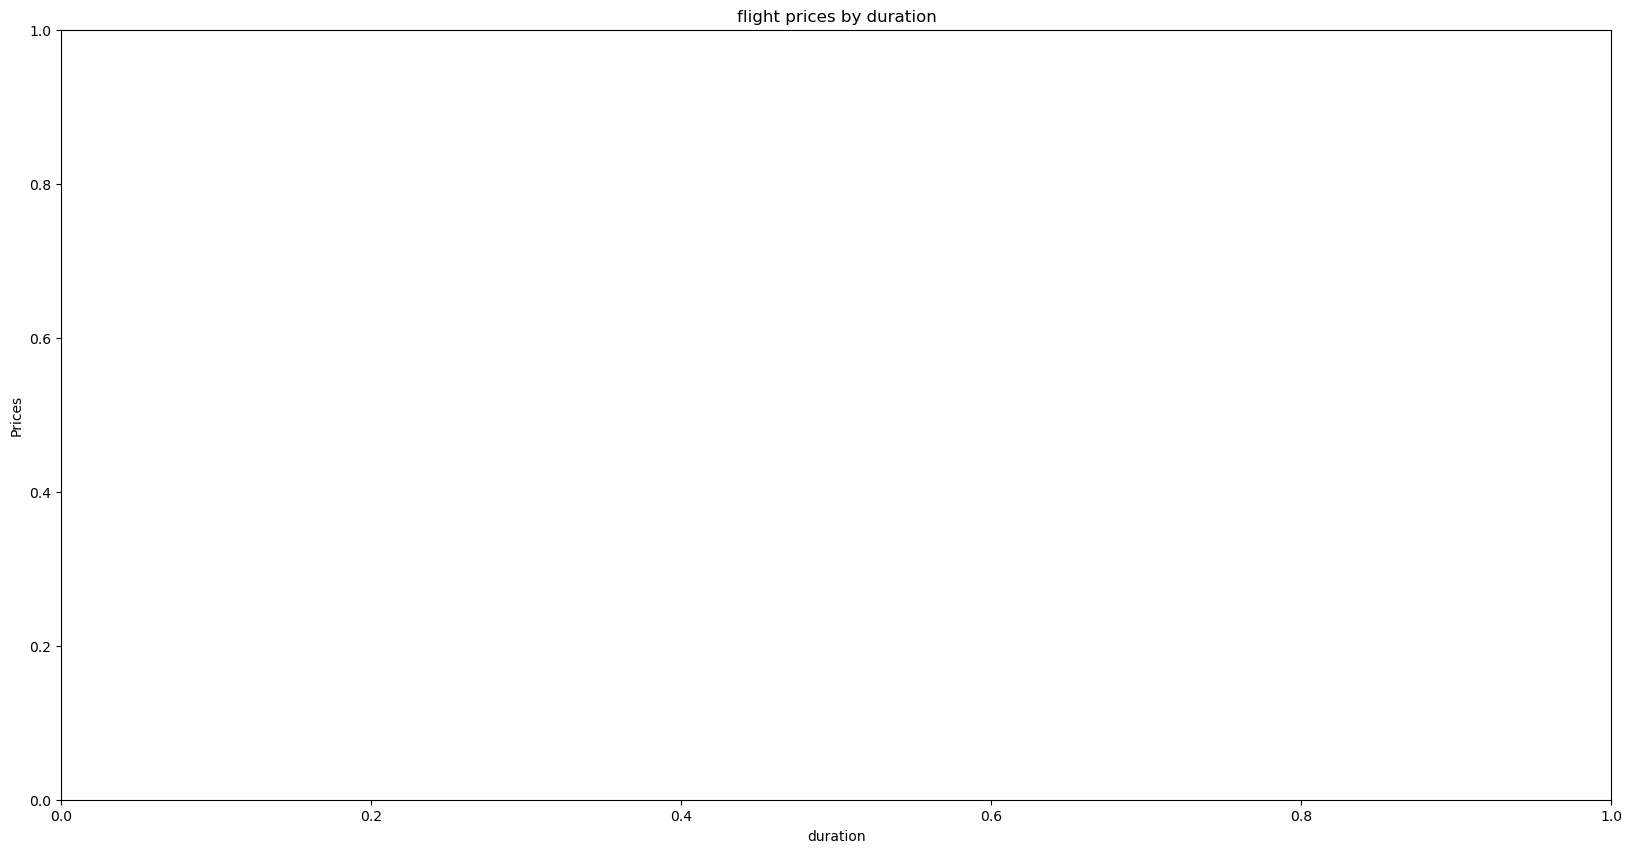

In [129]:
plt.bar(data.duration_hour,data.Price,color='green')
plt.xticks(rotation='vertical')
fig=plt.figure(figsize=(20,10))
plt.xlabel('duration')
plt.ylabel('Prices')
plt.title('flight prices by duration')

<Axes: xlabel='Destination', ylabel='Price'>

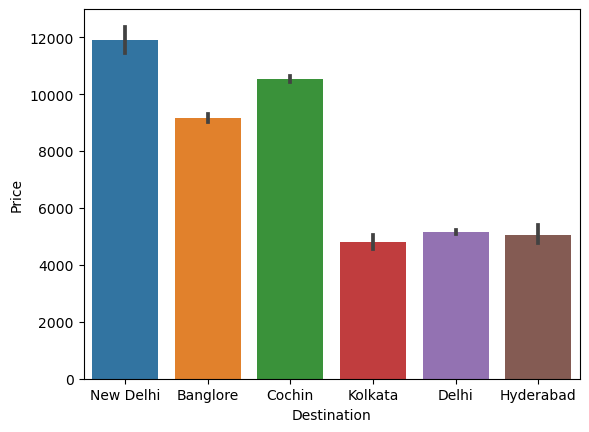

In [130]:
sns.barplot(x=data.Destination,y=data.Price)

<Axes: xlabel='day', ylabel='Price'>

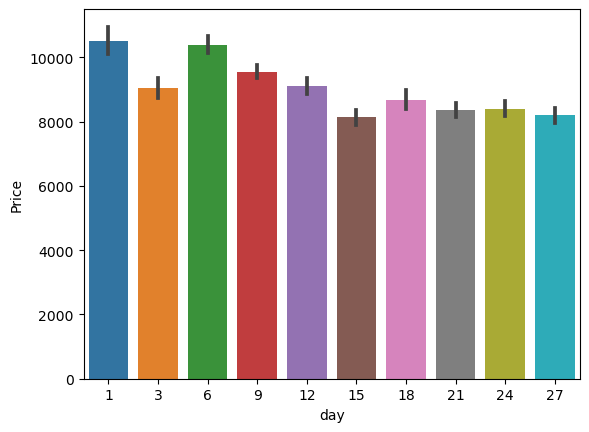

In [131]:
sns.barplot(x=data.day,y=data.Price)

In [132]:
conditions=[
    (data['duration_hour']>10),#durations longer than 10hrs
    (data['duration_hour']<10)
]

choices=['long_distance','short_distance']

data['distance_mode']=np.select(conditions,choices,default=np.nan)

Text(0.5, 1.0, 'prices based on duration mode')

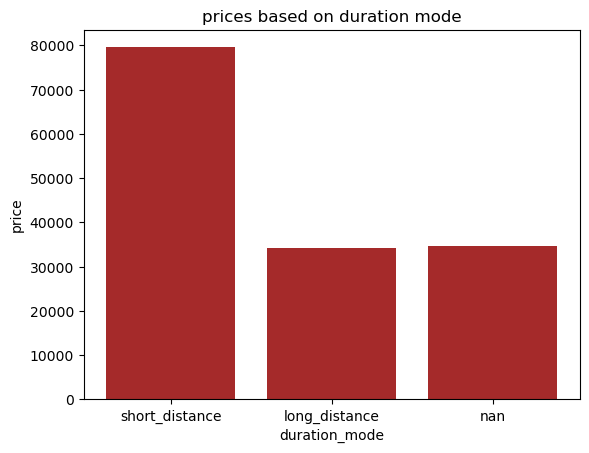

In [133]:
plt.bar(data.distance_mode,data.Price,color='brown')
plt.xlabel('duration_mode')
plt.ylabel('price')
plt.title('prices based on duration mode')

Text(0.5, 0, 'departure time')

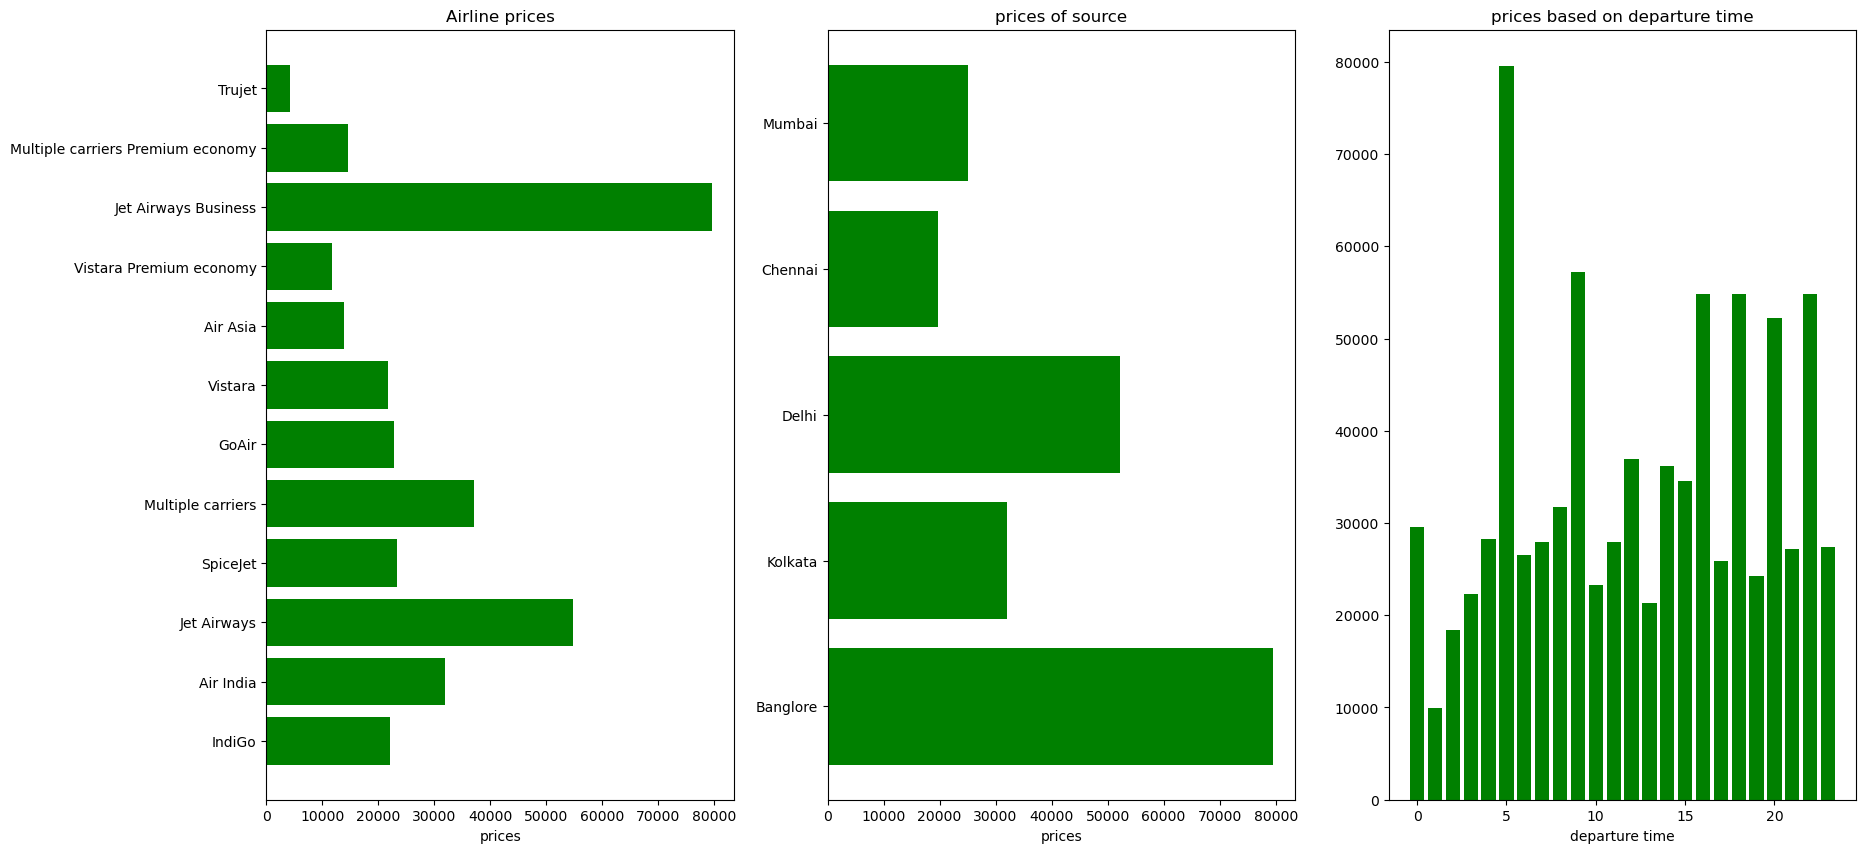

In [134]:
fig=plt.figure(figsize=(35,10),facecolor='white')

rows=1
columns=5

chart1=fig.add_subplot(rows,columns,1)
chart2=fig.add_subplot(rows,columns,2)
chart3=fig.add_subplot(rows,columns,3)


chart1.barh(data.Airline,data.Price,color='green')
chart2.barh(data.Source,data.Price,color='green')
chart3.bar(data.Dep_time_hour,data.Price,color='green')

# SET TITLES AND AXES
chart1.set_title('Airline prices')
chart1.set_xlabel('prices')

chart2.set_title('prices of source')
chart2.set_xlabel('prices')

chart3.set_title('prices based on departure time')
chart3.set_xlabel('departure time')

In [135]:

conditions = [
    (data['Dep_time_hour'] < 12),
    (data['Dep_time_hour'] >= 18),
    (data['Dep_time_hour'] >= 12) & (data['Dep_time_hour'] < 18)
]

choices = ['Morning', 'Night', 'Afternoon']

data['departure_mode'] = np.select(conditions, choices, default=np.nan)

Text(0.5, 1.0, 'Price based on departure mode')

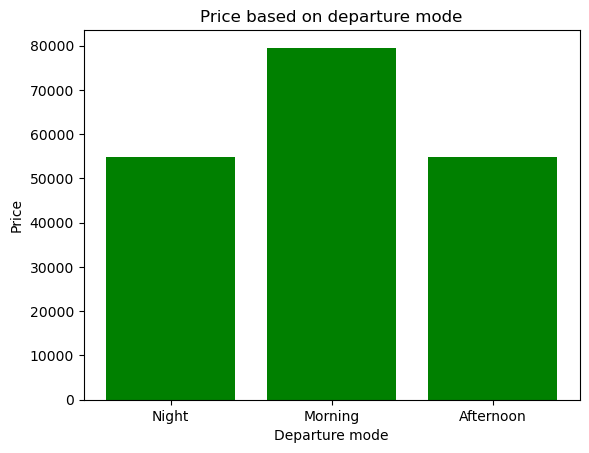

In [136]:
plt.bar(data['departure_mode'],data['Price'],color='green')
plt.ylabel('Price')
plt.xlabel('Departure mode')
plt.title('Price based on departure mode')

In [137]:
data.isna().any().sum()

0

In [138]:
data.dropna(inplace=True)

In [139]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,duration_hour,Minute,Route1,Route2,Route3,Route4,Dep_time_hour,Dep_time_min,Routes,year,day,month,distance_mode,departure_mode
0,IndiGo,24/03/2019,Banglore,New Delhi,0.0,3897,2,50,1,1,0,0,22,20,2,2019,24,3,short_distance,Night
1,Air India,1/5/2019,Kolkata,Banglore,2.0,7662,7,25,1,1,1,1,5,50,4,2019,1,5,short_distance,Morning
2,Jet Airways,9/6/2019,Delhi,Cochin,2.0,13882,19,0,1,1,1,1,9,25,4,2019,9,6,long_distance,Morning
3,IndiGo,12/5/2019,Kolkata,Banglore,1.0,6218,5,25,1,1,1,0,18,5,3,2019,12,5,short_distance,Night
4,IndiGo,1/3/2019,Banglore,New Delhi,1.0,13302,4,45,1,1,1,0,16,50,3,2019,1,3,short_distance,Afternoon


In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
label_encoder=LabelEncoder()

In [142]:
data['Source']=label_encoder.fit_transform(data['Source'])

In [143]:
data2=data.copy()

In [144]:
data2.head(50)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,duration_hour,Minute,Route1,Route2,Route3,Route4,Dep_time_hour,Dep_time_min,Routes,year,day,month,distance_mode,departure_mode
0,IndiGo,24/03/2019,0,New Delhi,0.0,3897,2,50,1,1,0,0,22,20,2,2019,24,3,short_distance,Night
1,Air India,1/5/2019,3,Banglore,2.0,7662,7,25,1,1,1,1,5,50,4,2019,1,5,short_distance,Morning
2,Jet Airways,9/6/2019,2,Cochin,2.0,13882,19,0,1,1,1,1,9,25,4,2019,9,6,long_distance,Morning
3,IndiGo,12/5/2019,3,Banglore,1.0,6218,5,25,1,1,1,0,18,5,3,2019,12,5,short_distance,Night
4,IndiGo,1/3/2019,0,New Delhi,1.0,13302,4,45,1,1,1,0,16,50,3,2019,1,3,short_distance,Afternoon
5,SpiceJet,24/06/2019,3,Banglore,0.0,3873,2,25,1,1,0,0,9,0,2,2019,24,6,short_distance,Morning
6,Jet Airways,12/3/2019,0,New Delhi,1.0,11087,15,30,1,1,1,0,18,55,3,2019,12,3,long_distance,Night
7,Jet Airways,1/3/2019,0,New Delhi,1.0,22270,21,5,1,1,1,0,8,0,3,2019,1,3,long_distance,Morning
8,Jet Airways,12/3/2019,0,New Delhi,1.0,11087,25,30,1,1,1,0,8,55,3,2019,12,3,long_distance,Morning
9,Multiple carriers,27/05/2019,2,Cochin,1.0,8625,7,50,1,1,1,0,11,25,3,2019,27,5,short_distance,Morning


In [145]:
data['Airline']=label_encoder.fit_transform(data['Airline'])

In [146]:
data['Destination']=label_encoder.fit_transform(data['Destination'])

In [147]:
data['distance_mode']=label_encoder.fit_transform(data['distance_mode'])

In [148]:
data['departure_mode']=label_encoder.fit_transform(data['departure_mode'])

In [149]:
data.head(50)

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,duration_hour,Minute,Route1,Route2,Route3,Route4,Dep_time_hour,Dep_time_min,Routes,year,day,month,distance_mode,departure_mode
0,3,24/03/2019,0,5,0.0,3897,2,50,1,1,0,0,22,20,2,2019,24,3,2,2
1,1,1/5/2019,3,0,2.0,7662,7,25,1,1,1,1,5,50,4,2019,1,5,2,1
2,4,9/6/2019,2,1,2.0,13882,19,0,1,1,1,1,9,25,4,2019,9,6,0,1
3,3,12/5/2019,3,0,1.0,6218,5,25,1,1,1,0,18,5,3,2019,12,5,2,2
4,3,1/3/2019,0,5,1.0,13302,4,45,1,1,1,0,16,50,3,2019,1,3,2,0
5,8,24/06/2019,3,0,0.0,3873,2,25,1,1,0,0,9,0,2,2019,24,6,2,1
6,4,12/3/2019,0,5,1.0,11087,15,30,1,1,1,0,18,55,3,2019,12,3,0,2
7,4,1/3/2019,0,5,1.0,22270,21,5,1,1,1,0,8,0,3,2019,1,3,0,1
8,4,12/3/2019,0,5,1.0,11087,25,30,1,1,1,0,8,55,3,2019,12,3,0,1
9,6,27/05/2019,2,1,1.0,8625,7,50,1,1,1,0,11,25,3,2019,27,5,2,1


In [150]:
X=data.drop(columns=['Price','Date_of_Journey', 'Minute', 'Route1', 'Route2', 'Route3',
       'Route4','Dep_time_hour', 'Dep_time_min','year'],axis='columns')

In [151]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Total_Stops',
       'Price', 'duration_hour', 'Minute', 'Route1', 'Route2', 'Route3',
       'Route4', 'Dep_time_hour', 'Dep_time_min', 'Routes', 'year', 'day',
       'month', 'distance_mode', 'departure_mode'],
      dtype='object')

In [152]:
y=data['Price']

In [153]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 10)
(1069, 10)
(9613,)
(1069,)


In [155]:
#Ridge Regression
rid_reg=Ridge(solver='auto',alpha=1.0)

In [156]:
rid_reg.fit(X_train,y_train)

Ridge()

In [157]:
rid_reg.score(X_train,y_train)

0.4372227488381182

In [158]:
rid_reg.score(X_test,y_test)

0.42532945976766867

In [159]:
rid_reg.predict(X_test)

array([13278.86447337,  9224.11592968,  3628.78275338, ...,
       12000.64924477, 12204.01400829, 14308.6274399 ])

In [160]:
lin_reg=LinearRegression()

In [161]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [162]:
lin_reg.score(X_train,y_train)

0.4372238986788113

In [163]:
pipeline=make_pipeline(PolynomialFeatures(2),LinearRegression())

In [164]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [165]:
pipeline.score(X_train,y_train)

0.5861402403325482

In [166]:
from sklearn.model_selection import GridSearchCV


In [167]:
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [168]:
forest.score(X_train,y_train)

0.9121148864917544

In [169]:
forest.score(X_test,y_test)

0.7462317944513157

In [170]:
param_grid={
   "n_estimators":[100,150,200],
    "max_features":[6,8,10]
}

grid_search=GridSearchCV(forest,param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [100, 150, 200]})

In [171]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 200}

In [172]:
grid_search.score(X_train,y_train)

0.9130135087331901

In [173]:
grid_search.score(X_test,y_test)

0.7476104063800351

In [174]:
pred=grid_search.predict(X_test)
pred

array([16485.5245    ,  5938.75358333,  6223.33283333, ...,
       13987.906     , 12115.465     , 10410.25267857])

In [175]:
prediction=pd.DataFrame(pred)

In [176]:
new_merge=pd.merge(y_test,prediction,left_index=True, right_index=True)
new_merge

,Price,0
346,16079,17729.157738
967,5126,10906.861667
960,2175,13473.407000
1010,4812,7766.694235
895,9027,6529.075000
...,...,...
590,8586,11735.304801
29,3687,5229.708226
568,4804,12823.211565
217,4077,12868.770000


In [177]:
X.head(2)

,Airline,Source,Destination,Total_Stops,duration_hour,Routes,day,month,distance_mode,departure_mode
0,3,0,5,0.0,2,2,24,3,2,2
1,1,3,0,2.0,7,4,1,5,2,1


In [178]:
import pickle

In [179]:
model_name='flight-predict.pkl'

pickle.dump(grid_search,open(model_name,'wb'))

model=pickle.load(open('flight-predict.pkl','rb'))